## Load imports

In [1]:
import requests
import json
import time
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

## Read in the data

In [2]:
df_1 = pd.read_csv('data_a.csv')
df_2 = pd.read_csv('data_b.csv')

In [105]:
df_1.head()


,Unnamed: 0,title,ups,num_comments,subreddit_name_prefixed
0,0,This old YouTube channel about stock analysis ...,1208,34,r/stocks
1,1,"Facebook's put play from yesterday. Im 20, tim...",874,569,r/stocks
2,2,Would anyone be interested in an AMA from a re...,693,87,r/stocks
3,3,Don't worry guys,631,88,r/stocks
4,4,"Tesla meets self-imposed deadline for Model 3,...",628,141,r/stocks


In [106]:
df_2.head()

,Unnamed: 0,title,ups,num_comments,subreddit_name_prefixed
0,0,Storm chasers are paying tribute to Bill Paxto...,1835,70,r/weather
1,1,I'm from Colima. I'm gonna try to post whateve...,1093,727,r/weather
2,2,The Weather Channel has the perfect response f...,913,78,r/weather
3,3,From someone in an area that never has tornado...,835,652,r/weather
4,4,Heard the sirens. Stepped out of my office. Th...,697,82,r/weather


In [5]:
R = pd.concat([df_1,df_2], axis=0)

In [6]:
R.head()

,Unnamed: 0,title,ups,num_comments,subreddit_name_prefixed
0,0,This old YouTube channel about stock analysis ...,1208,34,r/stocks
1,1,"Facebook's put play from yesterday. Im 20, tim...",874,569,r/stocks
2,2,Would anyone be interested in an AMA from a re...,693,87,r/stocks
3,3,Don't worry guys,631,88,r/stocks
4,4,"Tesla meets self-imposed deadline for Model 3,...",628,141,r/stocks


In [7]:
R.tail()

,Unnamed: 0,title,ups,num_comments,subreddit_name_prefixed
995,995,Caught a nice lightening strike last night in ...,89,9,r/weather
996,996,To put it simply... it is very cold,91,32,r/weather
997,997,"This isn't the shot I was going for, but I thi...",90,2,r/weather
998,998,Welcome to Texas,92,9,r/weather
999,999,Supercell Sunset.,91,4,r/weather


## Perform EDA

In [8]:
R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 5 columns):
Unnamed: 0                 2000 non-null int64
title                      2000 non-null object
ups                        2000 non-null int64
num_comments               2000 non-null int64
subreddit_name_prefixed    2000 non-null object
dtypes: int64(3), object(2)
memory usage: 93.8+ KB


In [9]:
R.isnull().sum()

Unnamed: 0                 0
title                      0
ups                        0
num_comments               0
subreddit_name_prefixed    0
dtype: int64

In [10]:
R.describe()

,Unnamed: 0,ups,num_comments
count,2000.000000,2000.000000,2000.000000
mean,499.500000,146.736000,49.460000
std,288.747186,101.447948,75.167796
min,0.000000,54.000000,0.000000
25%,249.750000,92.000000,11.000000
50%,499.500000,119.000000,26.000000
75%,749.250000,170.000000,61.000000
max,999.000000,1835.000000,1588.000000


/Users/marcbirbach/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


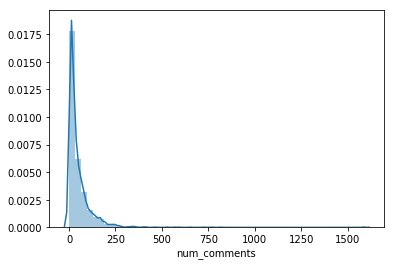

In [11]:
sns.distplot(R['num_comments'])

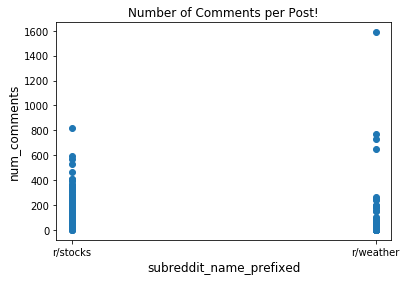

In [82]:
plt.scatter(R['subreddit_name_prefixed'], R['num_comments'])
plt.xlabel('subreddit_name_prefixed',fontsize='large')
plt.ylabel('num_comments',fontsize='large')
plt.title('Number of Comments per Post!', fontsize='large')
plt.show()

## NLP

#### Use `CountVectorizer` or `TfidfVectorizer` from scikit-learn to create features from the thread titles and descriptions (NOTE: Not all threads have a description)
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [22]:
corpus = R['title']

In [23]:
corpus

0      This old YouTube channel about stock analysis ...
1      Facebook's put play from yesterday. Im 20, tim...
2      Would anyone be interested in an AMA from a re...
3                                       Don't worry guys
4      Tesla meets self-imposed deadline for Model 3,...
5      The stock market has gone 104 consecutive days...
6      FB advertisers pulling out after $100 Billion ...
7      American Airlines cancels 12bn worth of Airbus...
8           Netflix to Begin Offering Games, Stock up 4%
9      If you bought SPY at the first second of regul...
10     Hi /r/stocks, I made a tool that allows you to...
11     Jobs report is in! Unemployment down to 3.9% f...
12     Snapchat popularity among millennials plummets...
13     [8 months ago] "My dad has $1.8 million dollar...
14     I made a cheat sheet on how to analyze stocks ...
15         This Youtube channel is criminally underrated
16         Just bought $500,000 worth of EA. Here's why.
17     What companies will bene

In [68]:
corpus.describe()

count                                                  2000
unique                                                 1994
top       I'm a professional trader and will analyze any...
freq                                                      3
Name: title, dtype: object

In [24]:
X = R['title']
y = R['subreddit_name_prefixed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
cvec = CountVectorizer(stop_words='english', max_features=100)
tvec = TfidfVectorizer(stop_words='english', max_features=100)

In [36]:
cvecdata_train = cvec.fit_transform(X_train)
cvec_df_train  = pd.DataFrame(cvecdata_train.todense(),
             columns=cvec.get_feature_names(),
                       index=X_train.index)

cvecdata_test = cvec.transform(X_test)
cvec_df_test  = pd.DataFrame(cvecdata_test.todense(),
             columns=cvec.get_feature_names(),
                       index=X_test.index)

In [33]:
cvec_df_train.head()

,000,10,11,15,17,18,20,2017,2018,30,...,tx,ve,video,vs,weather,week,worth,year,years,yesterday
836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tvecdata_train = tvec.fit_transform(X_train)
tvec_df_train  = pd.DataFrame(tvecdata.todense(),
                   columns=tvec.get_feature_names(),
                   index=X_train.index)

tvecdata_test = tvec.transform(X_test)
tvec_df_test  = pd.DataFrame(tvecdata_test.todense(),
             columns=tvec.get_feature_names(),
                       index=X_test.index)

In [35]:
tvec_df_train.head(10)

,000,10,11,15,17,18,20,2017,2018,30,...,tx,ve,video,vs,weather,week,worth,year,years,yesterday
836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.582868


In [110]:
Counter(cvec_df_test['000'])

Counter({1: 10, 0: 590})

In [125]:
word_counts = cvec_df_test.sum(axis=0)
word_counts.sort_values(ascending = False).head(25)

stock        56
stocks       45
tornado      39
storm        38
just         25
weather      25
market       21
new          20
today        20
hurricane    17
time         17
texas        16
supercell    15
buy          15
snow         15
years        15
earnings     15
clouds       14
day          14
like         13
yesterday    12
cloud        12
amp          12
week         12
right        12
dtype: int64

# RandomForestClassifier

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor

In [44]:
forest = RandomForestClassifier(max_depth = 10, n_estimators=5, random_state=42)
forest.fit(cvec_df_train, y_train)
forest.score(cvec_df_test, y_test)

0.7716666666666666

In [45]:
rf= RandomForestClassifier()
cross_val_score(rf, cvec_df_train, y_train).mean()

0.8435682054204078

# LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg= LogisticRegression()
logreg.fit(tvec_df_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score(logreg, tvec_df_train, y_train)

array([0.82655246, 0.88008565, 0.84763948])